# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Definir os símbolos dos ativos
symbols = ['AAPL', 'MSFT', 'AMZN']

# Definir as datas de início e fim
start_date = '2021-06-01'
end_date = '2023-06-13'

# Baixar os dados dos ativos
data = yf.download(symbols, start=start_date, end=end_date)

# Exibir os dados
print(data)


[*********************100%***********************]  3 of 3 completed
             Adj Close                               Close              \
                  AAPL        AMZN        MSFT        AAPL        AMZN   
Date                                                                     
2021-06-01  122.840477  160.932495  243.046860  124.279999  160.932495   
2021-06-02  123.611450  161.699493  242.948608  125.059998  161.699493   
2021-06-03  122.109055  159.350494  241.386612  123.540001  159.350494   
2021-06-04  124.431839  160.311005  246.377213  125.889999  160.311005   
2021-06-07  124.441727  159.900497  249.344086  125.900002  159.900497   
...                ...         ...         ...         ...         ...   
2023-06-06  179.210007  126.610001  333.679993  179.210007  126.610001   
2023-06-07  177.820007  121.230003  323.380005  177.820007  121.230003   
2023-06-08  180.570007  124.250000  325.260010  180.570007  124.250000   
2023-06-09  180.960007  123.430000  326.790

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [6]:
# Converter MultiIndex em Index
data.columns = data.columns.map('_'.join)

# Renomear as colunas dos ativos incorporando as categorias no nome
data.columns = [f"{col.split('_')[1]}_{col.split('_')[0]}" if col != 'Date' else col for col in data.columns]


# Calcular a amplitude de variação para cada ativo
for i in ['AAPL', 'AMZN', 'MSFT']:
    amplitude = data.filter(regex=i+'_High').max(axis=1) - data.filter(regex=i+'_Low').min(axis=1)

    # Adicionar a coluna de amplitude no DataFrame
    data[i+'Amplitude'] = amplitude



data['day'] = data.index

data.to_excel('dados_ativos.xlsx')

<ipython-input-6-6b287047fca1>:19: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  data.to_excel('dados_ativos.xlsx')


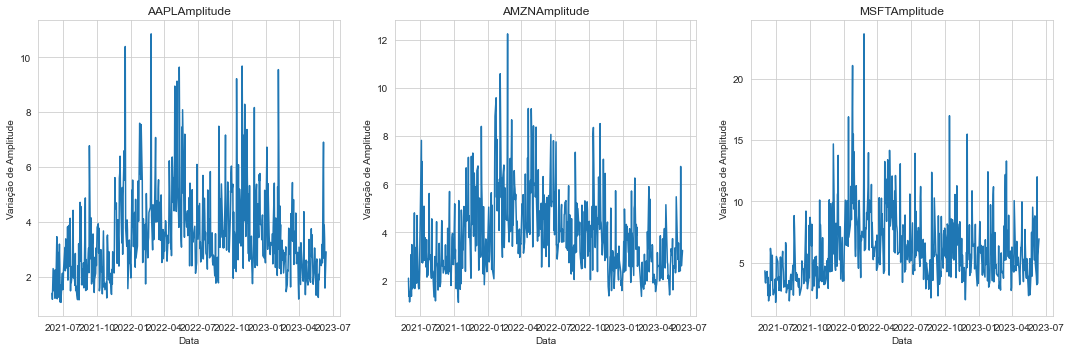

In [9]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ativo in enumerate(['AAPLAmplitude', 'AMZNAmplitude', 'MSFTAmplitude']):
    sns.lineplot(data=data, x='day', y=ativo, ax=axes[i])
    axes[i].set_xlabel('Data')
    axes[i].set_ylabel('Variação de Amplitude')
    axes[i].set_title(ativo.split('_')[0])

plt.tight_layout()


plt.show()

O ativo que parece ter mais volatividade é p AAPL